<a href="https://colab.research.google.com/github/AndreMartins21/Analise-SISU-UFMG/blob/main/SISU_UFMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - LENDO O PDF, MANIPULANDO AS STRINGS E CRIANDO O DATAFRAME

In [2]:
# Importando as Bibliotecas

!pip install PyPDF2

import PyPDF2 as PDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

**<> Lendo o arquivo PDF, e salvando todas as páginas**

In [3]:
arquivo = '/content/drive/MyDrive/Colab Notebooks/DataSet Kaggle/SISU UFMG.pdf'

lerPDF = PDF.PdfFileReader(arquivo)

num_page = lerPDF.numPages

paginas = []

# Filtrando os dados dos arquivos, separando somente os cursos / turnos / modalidade / máximo / mínimo
for cont in range(0, num_page):
  page = lerPDF.getPage(cont)

  conteudo = page.extractText()

  # SEPARAR SOMENTE OS CURSOS E SUAS NOTAS
  inicio = conteudo.find("MínimoMáximo") + len("MínimoMáximo")

  # Se for a última página:
  if cont == 15:
    fim = conteudo.find("334")
  else: 
    fim = conteudo.find("21/04/2021")
  
  paginas.append(conteudo[inicio:fim])

In [17]:
paginas[5]

'EDUCAÇÃO FÍSICA (Bacharelado)NoturnoAmplaconcorrência682,38768,30EDUCAÇÃO FÍSICA (Licenciatura)Matutino1.1460,60460,60EDUCAÇÃO FÍSICA (Licenciatura)Matutino1.2602,58628,22EDUCAÇÃO FÍSICA (Licenciatura)Matutino2.1436,00436,00EDUCAÇÃO FÍSICA (Licenciatura)Matutino2.2640,08662,94EDUCAÇÃO FÍSICA (Licenciatura)Matutino3.1499,32499,32EDUCAÇÃO FÍSICA (Licenciatura)Matutino3.2633,60671,58EDUCAÇÃO FÍSICA (Licenciatura)Matutino4.1589,92589,92EDUCAÇÃO FÍSICA (Licenciatura)Matutino4.2649,88677,42EDUCAÇÃO FÍSICA (Licenciatura)MatutinoAmplaconcorrência661,08689,90ENFERMAGEMMatutino1.1608,68608,68ENFERMAGEMMatutino1.2686,64718,28ENFERMAGEMMatutino2.1616,88616,88ENFERMAGEMMatutino2.2707,40722,92ENFERMAGEMMatutino3.1595,68595,68ENFERMAGEMMatutino3.2684,62735,64ENFERMAGEMMatutino4.1657,20657,20ENFERMAGEMMatutino4.2723,04740,42ENFERMAGEMMatutinoAmplaconcorrência727,52761,14ENGENHARIA AEROESPACIALMatutino1.1596,10596,10ENGENHARIA AEROESPACIALMatutino1.2699,08756,56ENGENHARIA AEROESPACIALMatutino2.1548,78

In [42]:
# SEPARANDO OS VALORES DE CADA COLUNA DO DATAFRAME

def sep_curso(string):
  
  # "6CIÊNCIAS CONTÁBEISNoturno"
  # Curso com maior nome tem 49 letras
  
  curso = r'[A-ZÍÃÓÇÔÊÉÁÂÚ\s()(Bacharelado)(Licenciatura)]{0,49}[VNMI]'
  find_curso = re.findall(curso, string)
  find_curso = list([x[:-1] for x in find_curso])
  return find_curso


def sep_turno(string):

  turno = r'Matutino|Noturno|Integral|Vespertino'

  find_turno = re.findall(turno, string)

  return find_turno

def sep_modalidade(string):
  #1.1 | Amplaconcorrência

  modalidade = r'\d{1}\.\d{1}|Amplaconcorrência'

  find_modalidade = re.findall(modalidade, string)

  return find_modalidade

def sep_minimo(string):
  #520,04

  minimo = r'\d{3},\d{3}'

  find_min = re.findall(minimo, string)
  find_min = list([x[:6] for x in find_min])

  return find_min

def sep_maximo(string):
  #04520

  maximo = r'\d{5},\d{2}'

  find_max = re.findall(maximo, string)
  find_max = list([x[2:] for x in find_max])

  return find_max


In [67]:
def data_frame(line):
  '''
  Função que retornará cada página do pdf em formato de DataFrame
  '''
  
  line = paginas[line]

  df_sisu = pd.DataFrame({
      "Curso": sep_curso(line),
      "Turno": sep_turno(line),
      "Modalidade": sep_modalidade(line),
      "Mínimo": sep_minimo(line),
      "Máximo": sep_maximo(line)
  })

  return df_sisu

data_frame(4).head()

,Curso,Turno,Modalidade,Mínimo,Máximo
0,CONTROLADORIA E FINANÇAS,Matutino,3.1,"557,82","557,82"
1,CONTROLADORIA E FINANÇAS,Matutino,3.2,"647,38","689,68"
2,CONTROLADORIA E FINANÇAS,Matutino,4.2,"717,08","761,82"
3,CONTROLADORIA E FINANÇAS,Matutino,Amplaconcorrência,"716,56","781,84"
4,DESIGN,Noturno,1.1,"578,92","578,92"


# - ANALISANDO OS ARQUIVOS

In [198]:
# Montando o dataframe completo

df = data_frame(0)

for cont in range(1, 16):
  df = df.append(data_frame(cont), ignore_index= True)

# Transformando os valores de MÁXIMO e MÍNIMO em float

df["Máximo"] = df["Máximo"].apply(lambda x: float(x.replace(",", ".")))
df["Mínimo"] = df["Mínimo"].apply(lambda x: float(x.replace(",", ".")))

df.head()

,Curso,Turno,Modalidade,Mínimo,Máximo
0,ADMINISTRAÇÃO,Matutino,1.1,520.04,520.04
1,ADMINISTRAÇÃO,Matutino,1.2,642.08,674.66
2,ADMINISTRAÇÃO,Matutino,2.1,649.12,649.12
3,ADMINISTRAÇÃO,Matutino,2.2,698.38,719.48
4,ADMINISTRAÇÃO,Matutino,3.1,559.88,559.88


## **1°: Número de cursos ofertados no SISU UFMG 2021**

In [199]:
num_cursos = df["Curso"].nunique()

print(f"Há {num_cursos} cursos ofertados no Sisu UFMG - 1° Edição")

Há 71 cursos ofertados no Sisu UFMG - 1° Edição


### **Função que será usada para os tópicos 2 e 3:**

In [377]:
modalidades = df["Modalidade"].unique()

# ['1.1', '1.2', '2.1', '2.2', '3.1', '3.2', '4.2', 'Amplaconcorrência', '4.1']

def top_modalidade(tipo = "Máximo",ind = 0):
  '''
  Essa função tem como objetivo retornar dois valores:
  O primeiro trata-se de um data_frame do mínimo ou máximo (var TIPO) para a determina modalidade solicitada (var IND).
  O segundo valor retornado, será a modalidade, visto que ao chamar essa função, deve-se passar um número inteiro que irá iterar pela lista "modalidades",
  fazendo com que retorne o nome propriamente dito de tal modalidade.
  '''

  asc = False
  if tipo == "Mínimo":
    asc = True

  df_modal = df[df["Modalidade"] == modalidades[ind]]

  df_modal = df_modal.sort_values(tipo, ascending= asc, ignore_index= True).head()

  # Adicionar a sigla do turno em cada curso
  cursos = df_modal["Curso"].values
  turnos = list([x[:3] for x in df_modal["Turno"].values])
  new_cursos = []

  for i, v in enumerate(cursos):
    v = f"{v} ({turnos[i]})"
    new_cursos.append(v)
  
  df_modal["Curso"] = new_cursos

  return df_modal[["Curso", tipo]], modalidades[ind] # Retornará o DF com o curso e o máximo, além da modalidade

v, i = top_modalidade(tipo = "Máximo", ind = 4)

v

,Curso,Máximo
0,MEDICINA (Int),733.10
1,HISTÓRIA (Mat),666.26
2,FILOSOFIA (Mat),628.56
3,ODONTOLOGIA (Mat),624.46
4,DIREITO (Not),623.00


##  **2°: Cinco cursos com as maiores notas POR MODALIDADE (Cotas e A.C.)**

### Ampla Concorrência:

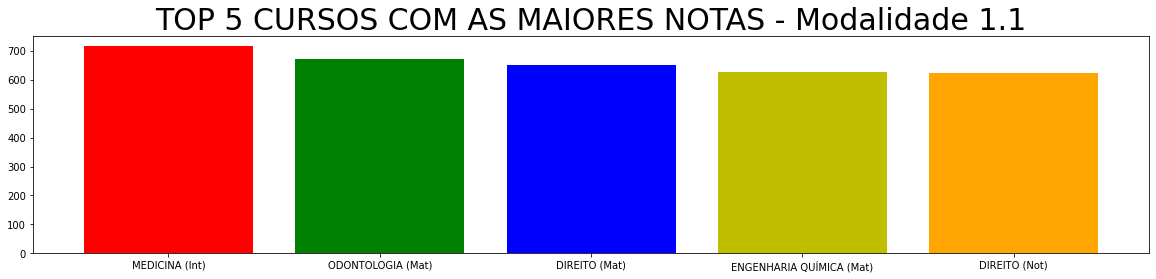

In [359]:
df_11, mod = top_modalidade(ind= 0)

plt.figure(figsize=(20, 4))
plt.bar(df_11["Curso"], df_11["Máximo"], color = ["r", "g", "b", "y", "orange"])
plt.title(f"TOP 5 CURSOS COM AS MAIORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

### Cotas:

In [ ]:
for cont in range(len(modalidades)):
  if cont != 7:
    df_11, mod = top_modalidade(cont)

    plt.figure(figsize=(20, 4))
    plt.bar(df_11["Curso"], df_11["Máximo"], color = ["r", "g", "b", "y", "orange"])
    plt.title(f"TOP 5 CURSOS COM AS MAIORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

##

## **3°: Cinco cursos com as menores notas POR MODALIDADE (Cotas e A.C.)**

### Ampla Concorrência

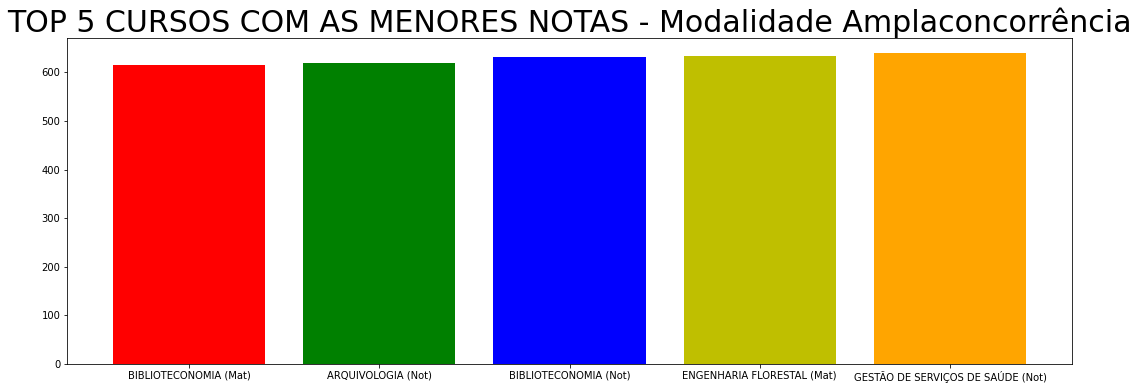

In [360]:
df_11, mod = top_modalidade("Mínimo", 7)

plt.figure(figsize=(18, 6))
plt.bar(df_11["Curso"], df_11["Mínimo"], color = ["r", "g", "b", "y", "orange"])
plt.title(f"TOP 5 CURSOS COM AS MENORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

### Cotas

In [ ]:
for cont in range(len(modalidades)):
  if cont != 7:
    df_11, mod = top_modalidade("Mínimo", cont)

    plt.figure(figsize=(20, 4))
    plt.bar(df_11["Curso"], df_11["Mínimo"], color = ["r", "g", "b", "y", "orange"])
    plt.title(f"TOP 5 CURSOS COM AS MENORES NOTAS - Modalidade {mod}", fontdict={"fontsize": 30});

## **4°: Número de cursos Matutinos / Noturnos / Integrais / Vespertinos**

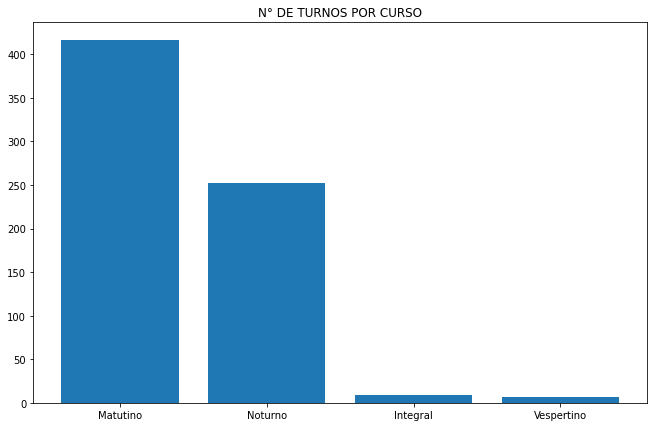

In [375]:
turnos = df["Turno"].value_counts()

y = turnos.values

x = turnos.index

plt.figure(figsize= (11, 7))
plt.bar(x, y)

plt.title("N° DE TURNOS POR CURSO");